Rewritten from: https://www.youtube.com/watch?v=qFJeN9V1ZsI

### **Data Preparation and Processing**

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example data:
- An experimental drug was tested on individuals from age 13 ro 100 in a clinical trial.
- The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
- Arround 95% of patients 65 or older experienced side effects. 
- Arround 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
# train_samples

In [7]:
# train_labels

In [8]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

### **Simple `tf.keras` Sequential Model**

In [12]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [18]:
# Only when you are running on a GPU

physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [19]:
model = Sequential(
    [
        Dense(units=16, input_shape=(1,), activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=2, activation="softmax"),
    ]
)

/Users/kubzal/tensorflow_keras/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [22]:
# model.fit(
#     x=scaled_train_samples,
#     y=train_labels,
#     batch_size=10,
#     epochs=30,
#     shuffle=True,
#     verbose=2,
# )

Epoch 1/30
210/210 - 1s - 6ms/step - accuracy: 0.5681 - loss: 0.6778
Epoch 2/30
210/210 - 0s - 1ms/step - accuracy: 0.6252 - loss: 0.6523
Epoch 3/30
210/210 - 0s - 978us/step - accuracy: 0.6976 - loss: 0.6263
Epoch 4/30
210/210 - 0s - 953us/step - accuracy: 0.7167 - loss: 0.5994
Epoch 5/30
210/210 - 0s - 953us/step - accuracy: 0.7505 - loss: 0.5710
Epoch 6/30
210/210 - 0s - 989us/step - accuracy: 0.7919 - loss: 0.5415
Epoch 7/30
210/210 - 0s - 938us/step - accuracy: 0.8095 - loss: 0.5119
Epoch 8/30
210/210 - 0s - 947us/step - accuracy: 0.8305 - loss: 0.4829
Epoch 9/30
210/210 - 0s - 985us/step - accuracy: 0.8438 - loss: 0.4549
Epoch 10/30
210/210 - 0s - 1ms/step - accuracy: 0.8614 - loss: 0.4291
Epoch 11/30
210/210 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.4050
Epoch 12/30
210/210 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.3837
Epoch 13/30
210/210 - 0s - 1ms/step - accuracy: 0.8910 - loss: 0.3649
Epoch 14/30
210/210 - 0s - 1ms/step - accuracy: 0.9052 - loss: 0.3488
Epoch 15/30
210

In [23]:
# with the validation set
# Note: validation_split is done before shuffling

model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=10,
    epochs=30,
    shuffle=True,
    verbose=2,
)

Epoch 1/30
189/189 - 0s - 2ms/step - accuracy: 0.9423 - loss: 0.2607 - val_accuracy: 0.9095 - val_loss: 0.3085
Epoch 2/30
189/189 - 0s - 1ms/step - accuracy: 0.9460 - loss: 0.2596 - val_accuracy: 0.9095 - val_loss: 0.3080
Epoch 3/30
189/189 - 0s - 1ms/step - accuracy: 0.9439 - loss: 0.2585 - val_accuracy: 0.9095 - val_loss: 0.3075
Epoch 4/30
189/189 - 0s - 1ms/step - accuracy: 0.9423 - loss: 0.2575 - val_accuracy: 0.9095 - val_loss: 0.3068
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.9444 - loss: 0.2563 - val_accuracy: 0.9190 - val_loss: 0.3059
Epoch 6/30
189/189 - 0s - 2ms/step - accuracy: 0.9466 - loss: 0.2555 - val_accuracy: 0.9095 - val_loss: 0.3062
Epoch 7/30
189/189 - 0s - 1ms/step - accuracy: 0.9444 - loss: 0.2548 - val_accuracy: 0.9095 - val_loss: 0.3055
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.9444 - loss: 0.2538 - val_accuracy: 0.9190 - val_loss: 0.3049
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.9423 - loss: 0.2531 - val_accuracy: 0.9190 - val_loss: 0.3039
E

### **Generating Test Dataset**

In [24]:
test_labels = []
test_samples = []

In [25]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [26]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

### **Predict**

In [27]:
predictions = model.predict(
    x=scaler.transform(test_samples.reshape(-1, 1)), batch_size=10, verbose=0
)

In [29]:
predictions

array([[0.43038425, 0.5696157 ],
       [0.03516308, 0.96483696],
       [0.8168811 , 0.1831189 ],
       [0.9618887 , 0.03811134],
       [0.02206491, 0.9779351 ],
       [0.94800526, 0.05199472],
       [0.11083551, 0.8891644 ],
       [0.9609355 , 0.03906445],
       [0.96327657, 0.03672342],
       [0.9298561 , 0.07014387],
       [0.96061283, 0.03938721],
       [0.02480527, 0.9751948 ],
       [0.11083551, 0.8891644 ],
       [0.9528009 , 0.04719904],
       [0.5772748 , 0.42272532],
       [0.12490136, 0.8750987 ],
       [0.04426798, 0.9557319 ],
       [0.04426798, 0.9557319 ],
       [0.02480527, 0.9751948 ],
       [0.57727474, 0.4227253 ],
       [0.14090607, 0.85909384],
       [0.01744333, 0.9825566 ],
       [0.01377612, 0.9862238 ],
       [0.9601452 , 0.03985468],
       [0.96061283, 0.03938721],
       [0.16010654, 0.8398934 ],
       [0.21981376, 0.78018624],
       [0.9637282 , 0.03627169],
       [0.06963474, 0.9303653 ],
       [0.9631248 , 0.03687521],
       [0.

In [30]:
# Taking the argmax of the predictions to get the predicted class
# (index of the class with the highest probability)

rounded_predictions = np.argmax(predictions, axis=-1)

In [31]:
rounded_predictions

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,

### **Confusion Matrix**

In [33]:
# %matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [34]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [37]:
# TODO: Fix the plot_confusion_matrix function, or replace it with some implementation from sklearn


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting '
    normalize=True.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(ticks=tick_marks, labels=classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",  # Corrected typo here
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[195  15]
 [  9 201]]


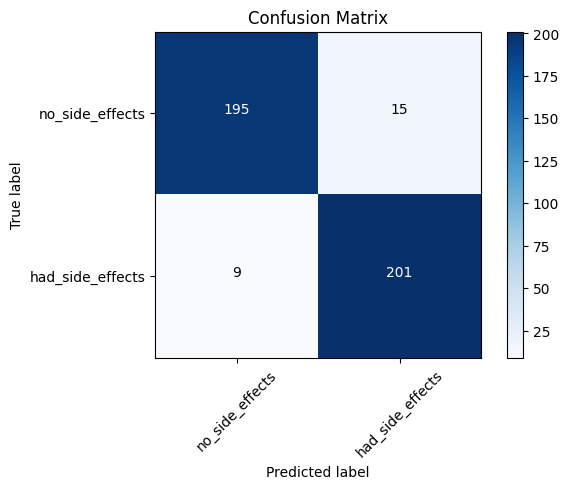

In [40]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

### **Save and Load a Model**

#### **1. model.save()**

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

In [42]:
# Check first to see if file exists already
# If not, the model is saved to disk.

import os.path
if os.path.isfile("models/medical_trial_model.h5") is False:
    model.save("models/medical_trial_model.h5")

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

In [43]:
from tensorflow.keras.models import load_model
new_model = load_model("models/medical_trial_model.h5")

In [44]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [45]:
new_model.get_weights()

[array([[ 2.7195922e-01,  2.7729267e-01, -1.5948507e-01,  2.4409623e-01,
         -4.0745670e-01,  5.8019888e-01,  4.6914348e-01,  1.0100777e-05,
         -9.2161894e-03,  3.9938971e-01, -2.6507556e-02,  4.6812894e-04,
         -1.7353693e-01, -7.6949835e-02, -5.5766106e-04, -5.4803854e-01]],
       dtype=float32),
 array([-0.1085396 , -0.11533346,  0.        ,  0.1564037 ,  0.        ,
        -0.15501794, -0.12145576, -0.00137475,  0.        , -0.14224476,
         0.        , -0.00192856,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-8.68847817e-02, -3.69961560e-02,  2.55636692e-01,
         -5.28289020e-01, -4.66086924e-01,  4.26100880e-01,
          4.20250371e-02, -1.16046749e-01,  3.52752954e-01,
         -3.54248375e-01,  3.90967131e-02,  5.91757596e-01,
          6.47287786e-01,  1.79997757e-01, -7.08821476e-01,
          2.07936898e-01,  5.59457660e-01,  4.98828143e-01,
         -5.06476462e-02, -7.63448298e-01, -4.59008187e-01,
      

In [46]:
new_model.optimizer

#### **2. model.to_json()**

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [50]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [52]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": 

In [53]:
# model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

#### **3. model.save_weights()**
If you only need to save the weigts of a model, you can use the following fuction save the weights only.

In [55]:
# Check first to see if file exists already.
# If not, the weights are saved to disk.

import os.path
if os.path.isfile("models/my_model.weights.h5") is False:
    model.save_weights("models/my_model.weights.h5")

In [56]:
model2 = Sequential(
    [
        Dense(units=16, input_shape=(1,), activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=2, activation="softmax"),
    ]
)

/Users/kubzal/tensorflow_keras/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model2.load_weights("models/my_model.weights.h5")

In [58]:
model2.load_weights("models/my_model.weights.h5")

In [60]:
model2.get_weights()

[array([[ 2.7195922e-01,  2.7729267e-01, -1.5948507e-01,  2.4409623e-01,
         -4.0745670e-01,  5.8019888e-01,  4.6914348e-01,  1.0100777e-05,
         -9.2161894e-03,  3.9938971e-01, -2.6507556e-02,  4.6812894e-04,
         -1.7353693e-01, -7.6949835e-02, -5.5766106e-04, -5.4803854e-01]],
       dtype=float32),
 array([-0.1085396 , -0.11533346,  0.        ,  0.1564037 ,  0.        ,
        -0.15501794, -0.12145576, -0.00137475,  0.        , -0.14224476,
         0.        , -0.00192856,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-8.68847817e-02, -3.69961560e-02,  2.55636692e-01,
         -5.28289020e-01, -4.66086924e-01,  4.26100880e-01,
          4.20250371e-02, -1.16046749e-01,  3.52752954e-01,
         -3.54248375e-01,  3.90967131e-02,  5.91757596e-01,
          6.47287786e-01,  1.79997757e-01, -7.08821476e-01,
          2.07936898e-01,  5.59457660e-01,  4.98828143e-01,
         -5.06476462e-02, -7.63448298e-01, -4.59008187e-01,
      